In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
file = '../ReplaceVal/0133test.csv'

In [4]:
df = pd.read_csv(file)

In [5]:
#df = df.loc[(df.q3 != 12) &(df.q3 != 11)&(df.q3 != 13) & (df.q3 != 14) & (df.q3 != 29) &(df.q3 != 26)& (df.q3 != 30) & (df.q3 != 21)]

In [6]:
df = df.loc[(df.q3 != 12) & (df.q3 != 14) & (df.q3 != 29) &(df.q3 != 26)& (df.q3 != 30) & (df.q3 != 21) & (df.q3 != 47)]

In [7]:
#df = df.loc[df.q3 != (12 or 14 or 21 or 26 or 29 or 30 or 47)]

In [8]:
#df = df.loc[df.q3_toshiruikei != (1)]

In [9]:
#df = df.loc[df.q3_toshiruikei == 4]

In [10]:
df = df.loc[(df.q15_3 != 50) & (df.q15_3 != 98) & (df.q15_3 != 99) &(df.q15_3 != 49)]

In [11]:
df.q3.unique()

array([10, 16, 11, 40, 38,  4, 43,  7,  5,  1,  6, 46, 50,  9,  8, 37, 45,
       20, 34, 13,  2,  3, 32, 31, 35, 36, 42, 19, 28, 27, 44, 15, 24, 33,
       25, 17, 22, 18, 23, 39, 41])

In [12]:
df['moved_pref_first_job'] = 0
df.loc[df.q3 != df.q15_3, 'moved_pref_first_job'] = 1

In [13]:
df['moved_within_pref_first_job'] = 0

In [14]:
df.loc[(df.q3 == df.q15_3) & (df.q3_toshiruikei != df.q15_3_toshiruikei), 'moved_within_pref_first_job'] = 1

In [15]:
df['moved_first_job'] = df['moved_pref_first_job'] + df['moved_within_pref_first_job']

In [16]:
year = 1981

In [17]:
df['birth_year'] = year - df.q1

In [18]:
df['counts'] = 1

In [19]:
df['first_job_year'] = df['birth_year'] + df.q15_9_1

In [20]:
_df = df[['birth_year', 'moved_pref_first_job', 'counts']].copy()
df_group1 = _df.groupby(['birth_year'])['moved_pref_first_job', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_92638/3546275096.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group1 = _df.groupby(['birth_year'])['moved_pref_first_job', 'counts'].sum().reset_index()


In [21]:
df_group1['moved_pref_ratio'] = df_group1.moved_pref_first_job / df_group1.counts

In [22]:
df_group1['moved_ratio_SMA_5'] = df_group1['moved_pref_ratio'].rolling(window=5).mean()

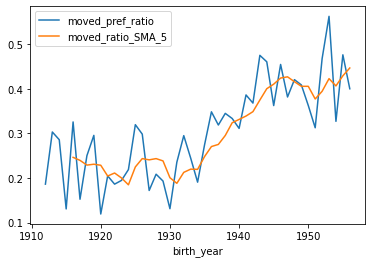

In [23]:
fig, ax = plt.subplots()
df_group1.plot(x = 'birth_year', y = 'moved_pref_ratio', ax = ax)
df_group1.plot(x = 'birth_year', y = 'moved_ratio_SMA_5', ax = ax)
plt.show()

In [24]:
df_group1.loc[(df_group1.birth_year <= 1930) & (df_group1.birth_year >= 1920)].moved_pref_ratio.mean()

0.20406065987009292

In [25]:
df_group1.loc[df_group1.birth_year <= 1940].moved_pref_ratio.mean()

0.24373334561111443

In [26]:
df_group1.loc[(df_group1.birth_year <= 1950) & (df_group1.birth_year >= 1940)].moved_pref_ratio.mean()

0.3991545915954203

In [27]:
df_group1.loc[(df_group1.birth_year <= 1960) & (df_group1.birth_year >= 1950)].moved_pref_ratio.mean()

0.4154494315208601

In [28]:
df_group1.loc[df_group1.birth_year >= 1935].moved_pref_ratio.mean()

0.38887785895310406

In [29]:
df_group1.loc[df_group1.birth_year >= 1940].moved_pref_ratio.mean()

0.4080203840115085

In [30]:
_df0 = df[['birth_year', 'moved_within_pref_first_job', 'counts']].copy()
df_group0 = _df0.groupby(['birth_year'])['moved_within_pref_first_job', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_92638/2153551867.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group0 = _df0.groupby(['birth_year'])['moved_within_pref_first_job', 'counts'].sum().reset_index()


In [31]:
df_group0['moved_within_pref_ratio'] = df_group0.moved_within_pref_first_job / df_group0.counts

In [32]:
df_group0['moved_ratio_SMA_5'] = df_group0['moved_within_pref_ratio'].rolling(window=5).mean()

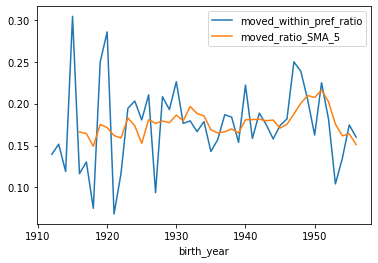

In [33]:
fig, ax = plt.subplots()
df_group0.plot(x = 'birth_year', y = 'moved_within_pref_ratio', ax = ax)
df_group0.plot(x = 'birth_year', y = 'moved_ratio_SMA_5', ax = ax)
plt.show()

In [34]:
_df01 = df[['first_job_year', 'moved_within_pref_first_job', 'counts']].copy()
df_group01 = _df01.groupby(['first_job_year'])['moved_within_pref_first_job', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_92638/2329475101.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group01 = _df01.groupby(['first_job_year'])['moved_within_pref_first_job', 'counts'].sum().reset_index()


In [35]:
df_group01['moved_within_pref_ratio'] = df_group01.moved_within_pref_first_job / df_group01.counts

In [36]:
df_group01['moved_ratio_SMA_5'] = df_group01['moved_within_pref_ratio'].rolling(window=5).mean()

In [37]:
df_group01 = df_group01[df_group01.first_job_year < 1981]

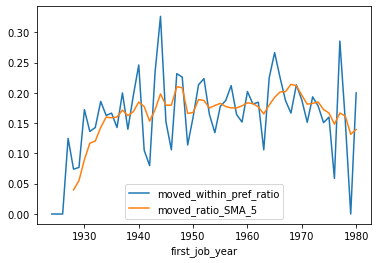

In [38]:
fig, ax = plt.subplots()
df_group01.plot(x = 'first_job_year', y = 'moved_within_pref_ratio', ax = ax)
df_group01.plot(x = 'first_job_year', y = 'moved_ratio_SMA_5', ax = ax)
plt.show()

In [39]:
df_group01.loc[(df_group01.first_job_year <= 1940) & (df_group01.first_job_year >= 1930)].moved_within_pref_ratio.mean()

0.17198196465611384

In [40]:
df_group01.loc[df_group01.first_job_year <= 1940].moved_within_pref_ratio.mean()

0.12751757424790605

In [41]:
df_group01.loc[(df_group01.first_job_year <= 1960) & (df_group01.first_job_year >= 1950)].moved_within_pref_ratio.mean()

0.18108919577811633

In [42]:
df_group01.loc[(df_group01.first_job_year <= 1970) & (df_group01.first_job_year >= 1960)].moved_within_pref_ratio.mean()

0.19524235817723465

In [43]:
_df2 = df[['first_job_year', 'moved_pref_first_job', 'counts']].copy()
df_group2 = _df2.groupby(['first_job_year'])['moved_pref_first_job', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_92638/221325499.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group2 = _df2.groupby(['first_job_year'])['moved_pref_first_job', 'counts'].sum().reset_index()


In [44]:
df_group2['moved_pref_ratio'] = df_group2.moved_pref_first_job / df_group2.counts

In [45]:
df_group2 = df_group2[(df_group2.first_job_year < 1981) & (df_group2.first_job_year >= 1927)]

In [46]:
df_group2['moved_ratio_SMA_3'] = df_group2['moved_pref_ratio'].rolling(window=3).mean()

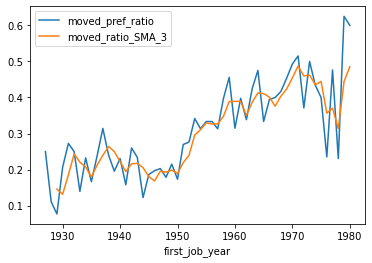

In [47]:
fig, ax = plt.subplots()
df_group2.plot(x = 'first_job_year', y = 'moved_pref_ratio', ax = ax)
df_group2.plot(x = 'first_job_year', y = 'moved_ratio_SMA_3', ax = ax)
plt.show()

In [48]:
df_group2

,first_job_year,moved_pref_first_job,counts,moved_pref_ratio,moved_ratio_SMA_3
3,1927,4,16,0.250000,NaN
4,1928,3,27,0.111111,NaN
5,1929,2,26,0.076923,0.146011
6,1930,6,29,0.206897,0.131644
7,1931,6,22,0.272727,0.185516
8,1932,7,28,0.250000,0.243208
9,1933,6,43,0.139535,0.220754
10,1934,10,43,0.232558,0.207364
11,1935,7,42,0.166667,0.179587
12,1936,10,42,0.238095,0.212440


In [49]:
df_group2.loc[(df_group2.first_job_year <= 1940) & (df_group2.first_job_year >= 1930)].moved_pref_ratio.mean()

0.22610780649428344

In [50]:
df_group2.loc[df_group2.first_job_year <= 1940].moved_pref_ratio.mean()

0.20894428996223616

In [51]:
df_group2.loc[(df_group2.first_job_year <= 1960) & (df_group2.first_job_year >= 1950)].moved_pref_ratio.mean()

0.32017074815911123

In [52]:
df_group2.loc[(df_group2.first_job_year <= 1970) & (df_group2.first_job_year >= 1960)].moved_pref_ratio.mean()

0.40368101188264605

In [53]:
_df3 = df[['first_job_year', 'moved_first_job', 'counts']].copy()
df_group3 = _df3.groupby(['first_job_year'])['moved_first_job', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_92638/1352619254.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group3 = _df3.groupby(['first_job_year'])['moved_first_job', 'counts'].sum().reset_index()


In [54]:
df_group3 = df_group3[(df_group3.first_job_year <= 1980) & (df_group3.first_job_year >= 1926)]

In [55]:
df_group3['moved_ratio'] = df_group3.moved_first_job / df_group3.counts

In [56]:
df_group3['moved_ratio_SMA_5'] = df_group3['moved_ratio'].rolling(window=5).mean()

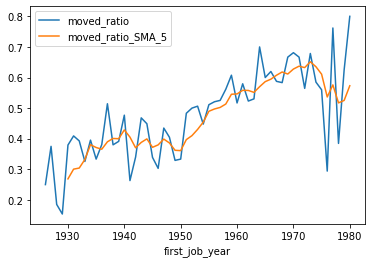

In [57]:
fig, ax = plt.subplots()
df_group3.plot(x = 'first_job_year', y = 'moved_ratio', ax = ax)
df_group3.plot(x = 'first_job_year', y = 'moved_ratio_SMA_5', ax = ax)
plt.show()

In [58]:
df_group3.loc[(df_group3.first_job_year <= 1940) & (df_group3.first_job_year >= 1930)].moved_ratio.mean()

0.3980897711503973

In [59]:
df_group3.loc[df_group3.first_job_year <= 1940].moved_ratio.mean()

0.35620125477904724

In [60]:
df_group3.loc[(df_group3.first_job_year <= 1960) & (df_group3.first_job_year >= 1950)].moved_ratio.mean()

0.5012599439372276

In [61]:
df_group3.loc[(df_group3.first_job_year <= 1970) & (df_group3.first_job_year >= 1960)].moved_ratio.mean()

0.5989233700598807

In [62]:
_df4 = df[['first_job_year', 'birth_year','q2', 'counts']].copy()

In [63]:
_df4.q2

0       1
1       1
2       1
3       1
4       1
       ..
4213    1
4216    2
4238    2
4243    2
4244    2
Name: q2, Length: 3069, dtype: int64

In [64]:
q2_dict = {
    1:0,
    2:1
}

In [65]:
_df4.q2 = _df4.q2.map(q2_dict)

In [66]:
_df4.q2

0       0
1       0
2       0
3       0
4       0
       ..
4213    0
4216    1
4238    1
4243    1
4244    1
Name: q2, Length: 3069, dtype: int64

In [67]:
df_group4 = _df4.groupby(['first_job_year'])['q2', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_92638/3784363881.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group4 = _df4.groupby(['first_job_year'])['q2', 'counts'].sum().reset_index()


In [68]:
df_group5 = _df4.groupby(['birth_year'])['q2', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_92638/114356776.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group5 = _df4.groupby(['birth_year'])['q2', 'counts'].sum().reset_index()


In [69]:
df_group4 = df_group4[df_group4.first_job_year <= 1981]

In [70]:
df_group4['moved_ratio'] = df_group4.q2/ df_group4.counts

In [71]:
df_group4['moved_ratio_SMA_5'] = df_group4['moved_ratio'].rolling(window=5).mean()

In [72]:
df_group5['moved_ratio'] = df_group5.q2/ df_group5.counts

In [73]:
df_group5['moved_ratio_SMA_5'] = df_group5['moved_ratio'].rolling(window=5).mean()

In [74]:
df_group5 = df_group5[df_group5.birth_year <= 1956]

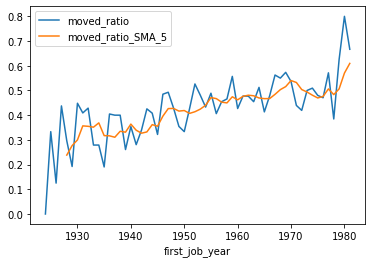

In [75]:
fig, ax = plt.subplots()
df_group4.plot(x = 'first_job_year', y = 'moved_ratio', ax = ax)
df_group4.plot(x = 'first_job_year', y = 'moved_ratio_SMA_5', ax = ax)
plt.show()

In [76]:
df_group4

,first_job_year,q2,counts,moved_ratio,moved_ratio_SMA_5
0,1924,0,1,0.000000,NaN
1,1925,1,3,0.333333,NaN
2,1926,1,8,0.125000,NaN
3,1927,7,16,0.437500,NaN
4,1928,8,27,0.296296,0.238426
5,1929,5,26,0.192308,0.276887
6,1930,13,29,0.448276,0.299876
7,1931,9,22,0.409091,0.356694
8,1932,12,28,0.428571,0.354908
9,1933,12,43,0.279070,0.351463


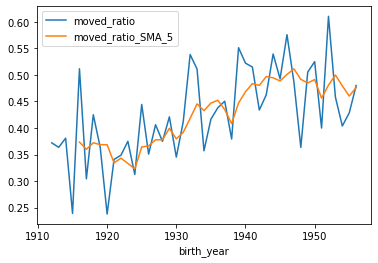

In [77]:
fig, ax = plt.subplots()
df_group5.plot(x = 'birth_year', y = 'moved_ratio', ax = ax)
df_group5.plot(x = 'birth_year', y = 'moved_ratio_SMA_5', ax = ax)
plt.show()

In [78]:
df.q15_8

0        3
1        1
2        3
3        1
4        1
        ..
4213     7
4216     7
4238    99
4243     3
4244     3
Name: q15_8, Length: 3069, dtype: int64

In [79]:
df['first_job_school'] = 0
df.loc[df.q15_8 == 3, 'first_job_school'] = 1

In [80]:
df['first_job_pub_emp'] = 0
df.loc[df.q15_8 == 4, 'first_job_pub_emp'] = 1

In [81]:
df['first_job_conn'] = 0
df.loc[df.q15_8 == 1, 'first_job_conn'] = 1
df.loc[df.q15_8 == 2, 'first_job_conn'] = 1

In [82]:
df['first_job_adv'] = 0
df.loc[df.q15_8 == 5, 'first_job_adv'] = 1

In [83]:
df['first_job_other'] = 0
df.loc[df.q15_8 == 6, 'first_job_other'] = 1

In [84]:
df['first_job_self'] = 0
df.loc[df.q15_8 == 7, 'first_job_self'] = 1

In [85]:
df

,Unnamed: 0,sampleno,kyojuuchi,q1,q2,q3,q3_toshiruikei,q4_1,q4_2,q5_1,...,moved_first_job,birth_year,counts,first_job_year,first_job_school,first_job_pub_emp,first_job_conn,first_job_adv,first_job_other,first_job_self
0,0,1,10,53,1,10,4,4,3,3,...,1,1928,1,1942,1,0,0,0,0,0
1,1,2,10,61,1,10,4,4,3,3,...,0,1920,1,1938,0,0,1,0,0,0
2,2,3,10,49,1,10,4,6,3,1,...,1,1932,1,1950,1,0,0,0,0,0
3,3,4,10,69,1,10,4,9,6,6,...,1,1912,1,1937,0,0,1,0,0,0
4,4,5,10,45,1,10,4,4,1,3,...,1,1936,1,1952,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,4213,4214,2,48,1,2,4,3,3,3,...,0,1933,1,1948,0,0,0,0,0,1
4216,4216,4217,47,56,2,50,7,4,2,2,...,1,1925,1,1947,0,0,0,0,0,1
4238,4238,4239,47,49,2,46,4,6,6,4,...,1,1932,1,1950,0,0,0,0,0,0
4243,4243,4244,47,31,2,44,3,6,5,4,...,1,1950,1,1968,1,0,0,0,0,0


In [86]:
_df6 = df[['first_job_year', 'birth_year','first_job_school', 'counts']].copy()

In [87]:
df_group6 = _df6.groupby(['first_job_year'])['first_job_school', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_92638/1416463483.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group6 = _df6.groupby(['first_job_year'])['first_job_school', 'counts'].sum().reset_index()


In [88]:
df_group6 = df_group6[df_group6.first_job_year <= 1981]

In [89]:
df_group6['school_ratio'] = df_group6.first_job_school/ df_group6.counts

In [90]:
df_group6['school_ratio_SMA_5'] = df_group6['school_ratio'].rolling(window=5).mean()

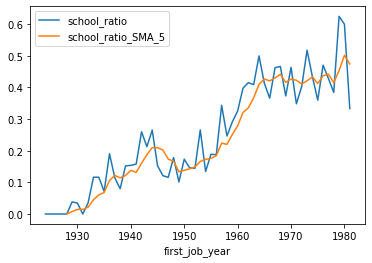

In [91]:
fig, ax = plt.subplots()
df_group6.plot(x = 'first_job_year', y = 'school_ratio', ax = ax)
df_group6.plot(x = 'first_job_year', y = 'school_ratio_SMA_5', ax = ax)
plt.show()

In [92]:
df_group6.loc[(df_group6.first_job_year <= 1955) & (df_group6.first_job_year >= 1950)].school_ratio.mean()

0.1755296038461507

In [93]:
df_group6.loc[(df_group6.first_job_year <= 1970) & (df_group6.first_job_year >= 1960)].school_ratio.mean()

0.41762219329145134

In [94]:
df_group6

,first_job_year,first_job_school,counts,school_ratio,school_ratio_SMA_5
0,1924,0,1,0.000000,NaN
1,1925,0,3,0.000000,NaN
2,1926,0,8,0.000000,NaN
3,1927,0,16,0.000000,NaN
4,1928,0,27,0.000000,0.000000
5,1929,1,26,0.038462,0.007692
6,1930,1,29,0.034483,0.014589
7,1931,0,22,0.000000,0.014589
8,1932,1,28,0.035714,0.021732
9,1933,5,43,0.116279,0.044988


In [95]:
_df7 = df[['first_job_year', 'birth_year','first_job_pub_emp', 'counts']].copy()

In [96]:
df_group7 = _df7.groupby(['first_job_year'])['first_job_pub_emp', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_92638/4224689988.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group7 = _df7.groupby(['first_job_year'])['first_job_pub_emp', 'counts'].sum().reset_index()


In [97]:
df_group7 = df_group7[df_group7.first_job_year <= 1981]

In [98]:
df_group7['pub_emp_ratio'] = df_group7.first_job_pub_emp/ df_group7.counts

In [99]:
df_group7['pub_emp_ratio_SMA_5'] = df_group7['pub_emp_ratio'].rolling(window=5).mean()

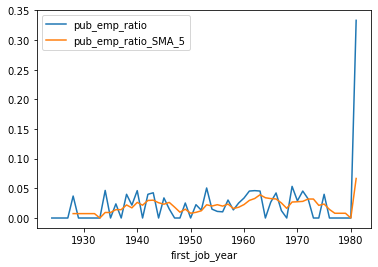

In [100]:
fig, ax = plt.subplots()
df_group7.plot(x = 'first_job_year', y = 'pub_emp_ratio', ax = ax)
df_group7.plot(x = 'first_job_year', y = 'pub_emp_ratio_SMA_5', ax = ax)
plt.show()

In [101]:
_df8 = df[['first_job_year', 'birth_year','first_job_conn', 'counts']].copy()

In [102]:
df_group8 = _df8.groupby(['first_job_year'])['first_job_conn', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_92638/3214844470.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group8 = _df8.groupby(['first_job_year'])['first_job_conn', 'counts'].sum().reset_index()


In [103]:
df_group8 = df_group8[(df_group8.first_job_year <= 1981) & (df_group8.first_job_year >= 1927)]

In [104]:
df_group8['conn_ratio'] = df_group8.first_job_conn/ df_group8.counts

In [105]:
df_group8['conn_ratio_SMA_5'] = df_group8['conn_ratio'].rolling(window=5).mean()

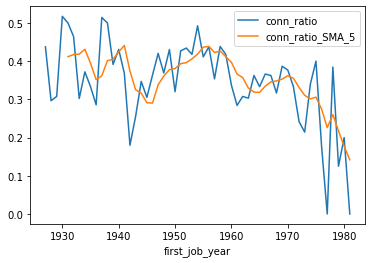

In [106]:
fig, ax = plt.subplots()
df_group8.plot(x = 'first_job_year', y = 'conn_ratio', ax = ax)
df_group8.plot(x = 'first_job_year', y = 'conn_ratio_SMA_5', ax = ax)
plt.show()

In [107]:
df_group8

,first_job_year,first_job_conn,counts,conn_ratio,conn_ratio_SMA_5
3,1927,7,16,0.437500,NaN
4,1928,8,27,0.296296,NaN
5,1929,8,26,0.307692,NaN
6,1930,15,29,0.517241,NaN
7,1931,11,22,0.500000,0.411746
8,1932,13,28,0.464286,0.417103
9,1933,13,43,0.302326,0.418309
10,1934,16,43,0.372093,0.431189
11,1935,14,42,0.333333,0.394408
12,1936,12,42,0.285714,0.351550


In [108]:
df_group8.loc[(df_group8.first_job_year <= 1940) & (df_group8.first_job_year >= 1930)].conn_ratio.mean()

0.4192138736523521

In [109]:
df_group8.loc[(df_group8.first_job_year <= 1950) & (df_group8.first_job_year >= 1940)].conn_ratio.mean()

0.34453513983652595

In [110]:
df_group8.loc[(df_group8.first_job_year <= 1960) & (df_group8.first_job_year >= 1950)].conn_ratio.mean()

0.40788531368850545

In [111]:
df_group8.loc[(df_group8.first_job_year <= 1970) & (df_group8.first_job_year >= 1960)].conn_ratio.mean()

0.33968796504246085

In [112]:
_df9 = df[['first_job_year', 'birth_year','first_job_adv', 'counts']].copy()

In [113]:
df_group9 = _df9.groupby(['first_job_year'])['first_job_adv', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_92638/1178086919.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group9 = _df9.groupby(['first_job_year'])['first_job_adv', 'counts'].sum().reset_index()


In [114]:
df_group9 = df_group9[df_group9.first_job_year <= 1981]

In [115]:
df_group9['adv_ratio'] = df_group9.first_job_adv/ df_group9.counts

In [116]:
df_group9['adv_ratio_SMA_5'] = df_group9['adv_ratio'].rolling(window=5).mean()

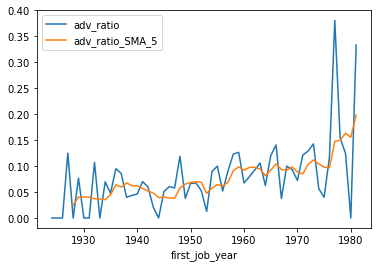

In [117]:
fig, ax = plt.subplots()
df_group9.plot(x = 'first_job_year', y = 'adv_ratio', ax = ax)
df_group9.plot(x = 'first_job_year', y = 'adv_ratio_SMA_5', ax = ax)
plt.show()

In [118]:
_df10 = df[['first_job_year', 'birth_year','first_job_other', 'counts']].copy()

In [119]:
df_group10 = _df10.groupby(['first_job_year'])['first_job_other', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_92638/3304460168.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group10 = _df10.groupby(['first_job_year'])['first_job_other', 'counts'].sum().reset_index()


In [120]:
df_group10 = df_group10[df_group10.first_job_year <= 1981]

In [121]:
df_group10['other_ratio'] = df_group10.first_job_other/ df_group10.counts

In [122]:
df_group10['other_ratio_SMA_5'] = df_group10['other_ratio'].rolling(window=5).mean()

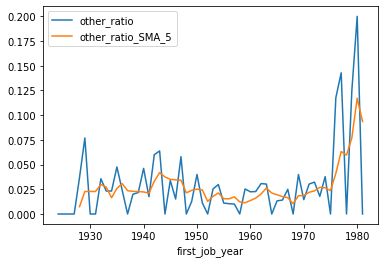

In [123]:
fig, ax = plt.subplots()
df_group10.plot(x = 'first_job_year', y = 'other_ratio', ax = ax)
df_group10.plot(x = 'first_job_year', y = 'other_ratio_SMA_5', ax = ax)
plt.show()

In [124]:
_df11 = df[['first_job_year', 'birth_year','first_job_self', 'counts']].copy()

In [125]:
df_group11 = _df11.groupby(['first_job_year'])['first_job_self', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_92638/957045670.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group11 = _df11.groupby(['first_job_year'])['first_job_self', 'counts'].sum().reset_index()


In [126]:
df_group11 = df_group11[(df_group11.first_job_year <= 1981) & (df_group11.first_job_year >= 1927)]

In [127]:
df_group11['self_ratio'] = df_group11.first_job_self/ df_group11.counts

In [128]:
df_group11['self_ratio_SMA_5'] = df_group11['self_ratio'].rolling(window=5).mean()

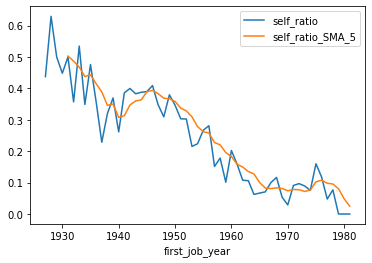

In [129]:
fig, ax = plt.subplots()
df_group11.plot(x = 'first_job_year', y = 'self_ratio', ax = ax)
df_group11.plot(x = 'first_job_year', y = 'self_ratio_SMA_5', ax = ax)
plt.show()

In [130]:
df_group11.loc[(df_group11.first_job_year <= 1940) & (df_group11.first_job_year >= 1930)].self_ratio.mean()

0.382013462752628

In [131]:
df_group11.loc[(df_group11.first_job_year <= 1970) & (df_group11.first_job_year >= 1960)].self_ratio.mean()

0.09760597481630634

In [132]:
df_group11

,first_job_year,first_job_self,counts,self_ratio,self_ratio_SMA_5
3,1927,7,16,0.437500,NaN
4,1928,17,27,0.629630,NaN
5,1929,13,26,0.500000,NaN
6,1930,13,29,0.448276,NaN
7,1931,11,22,0.500000,0.503081
8,1932,10,28,0.357143,0.487010
9,1933,23,43,0.534884,0.468060
10,1934,15,43,0.348837,0.437828
11,1935,20,42,0.476190,0.443411
12,1936,15,42,0.357143,0.414839


In [133]:
df.q15_4

0       35
1       47
2       60
3       60
4       48
        ..
4213     1
4216     1
4238    15
4243    15
4244    34
Name: q15_4, Length: 3069, dtype: int64

In [134]:
df['first_job_aff'] = 0
df.loc[df.q15_4 == (1 or 6 or 8 or 9), 'first_job_aff'] = 1

In [135]:
_df12 = df[['first_job_year', 'birth_year','first_job_aff', 'counts']].copy()

In [136]:
df_group12 = _df12.groupby(['first_job_year'])['first_job_aff', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_92638/1002455213.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group12 = _df12.groupby(['first_job_year'])['first_job_aff', 'counts'].sum().reset_index()


In [137]:
df_group12 = df_group12[(df_group12.first_job_year <= 1981) & (df_group12.first_job_year >= 1927)]

In [138]:
df_group12['aff_ratio'] = df_group12.first_job_aff/ df_group12.counts

In [139]:
df_group12['aff_ratio_SMA_5'] = df_group12['aff_ratio'].rolling(window=5).mean()

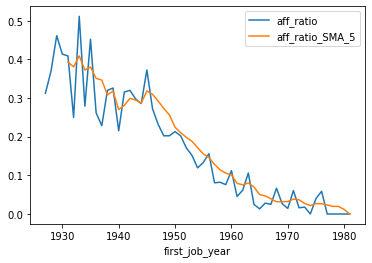

In [140]:
fig, ax = plt.subplots()
df_group12.plot(x = 'first_job_year', y = 'aff_ratio', ax = ax)
df_group12.plot(x = 'first_job_year', y = 'aff_ratio_SMA_5', ax = ax)
plt.show()

In [141]:
_df12 = df[['first_job_year', 'birth_year','first_job_aff', 'counts']].copy()

In [142]:
df_group12 = _df12.groupby(['first_job_year'])['first_job_aff', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_92638/1002455213.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group12 = _df12.groupby(['first_job_year'])['first_job_aff', 'counts'].sum().reset_index()


In [143]:
df_group12 = df_group12[(df_group12.first_job_year <= 1981) & (df_group12.first_job_year >= 1927)]

In [144]:
df_group12['aff_ratio'] = df_group12.first_job_aff/ df_group12.counts

In [145]:
df_group12['aff_ratio_SMA_5'] = df_group12['aff_ratio'].rolling(window=5).mean()

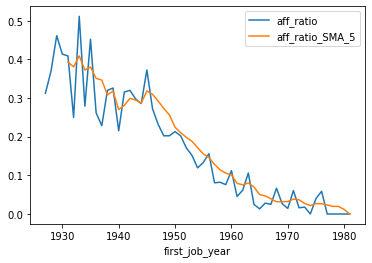

In [146]:
fig, ax = plt.subplots()
df_group12.plot(x = 'first_job_year', y = 'aff_ratio', ax = ax)
df_group12.plot(x = 'first_job_year', y = 'aff_ratio_SMA_5', ax = ax)
plt.show()

In [147]:
df_table1 = df[['first_job_aff', 'first_job_conn', 'first_job_school', 'first_job_self']]

In [148]:
df_table1.corr()

,first_job_aff,first_job_conn,first_job_school,first_job_self
first_job_aff,1.000000,-0.299525,-0.259858,0.745143
first_job_conn,-0.299525,1.000000,-0.448163,-0.421630
first_job_school,-0.259858,-0.448163,1.000000,-0.331144
first_job_self,0.745143,-0.421630,-0.331144,1.000000


In [149]:
_df13 = df[['first_job_year', 'birth_year','first_job_aff', 'first_job_self','first_job_school','counts']].copy()

In [150]:
_df13

,first_job_year,birth_year,first_job_aff,first_job_self,first_job_school,counts
0,1942,1928,0,0,1,1
1,1938,1920,0,0,0,1
2,1950,1932,0,0,1,1
3,1937,1912,0,0,0,1
4,1952,1936,0,0,0,1
...,...,...,...,...,...,...
4213,1948,1933,1,1,0,1
4216,1947,1925,1,1,0,1
4238,1950,1932,0,0,0,1
4243,1968,1950,0,0,1,1


In [151]:
_df13_temp = _df13.loc[df.first_job_self == 1, :]

In [152]:
df_group13 = _df13_temp.groupby(['first_job_year'])['first_job_aff', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_92638/4285348396.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group13 = _df13_temp.groupby(['first_job_year'])['first_job_aff', 'counts'].sum().reset_index()


In [153]:
df_group13 = df_group13[df_group13.first_job_year <= 1981]

In [154]:
df_group13['aff_ratio'] = df_group13.first_job_aff/ df_group13.counts

In [155]:
df_group13['aff_ratio_SMA_5'] = df_group13['aff_ratio'].rolling(window=5).mean()

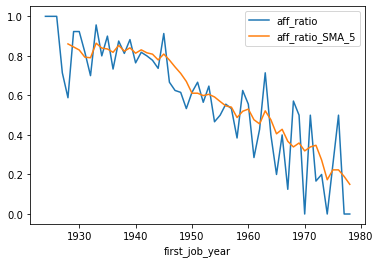

In [156]:
fig, ax = plt.subplots()
df_group13.plot(x = 'first_job_year', y = 'aff_ratio', ax = ax)
df_group13.plot(x = 'first_job_year', y = 'aff_ratio_SMA_5', ax = ax)
plt.show()

In [157]:
_df14_temp = _df13.loc[df.first_job_conn == 1, :]

In [158]:
_df14_temp

,first_job_year,birth_year,first_job_aff,first_job_self,first_job_school,counts
1,1938,1920,0,0,0,1
3,1937,1912,0,0,0,1
4,1952,1936,0,0,0,1
5,1941,1914,0,0,0,1
6,1956,1927,0,0,0,1
...,...,...,...,...,...,...
4191,1964,1945,0,0,0,1
4193,1937,1922,0,0,0,1
4194,1968,1950,0,0,0,1
4195,1957,1941,0,0,0,1


In [159]:
df_group14 = _df14_temp.groupby(['first_job_year'])['first_job_aff', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_92638/1553661346.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group14 = _df14_temp.groupby(['first_job_year'])['first_job_aff', 'counts'].sum().reset_index()


In [160]:
df_group14 = df_group14[df_group14.first_job_year <= 1981]

In [161]:
df_group14['aff_ratio'] = df_group14.first_job_aff/ df_group14.counts

In [162]:
df_group14['aff_ratio_SMA_5'] = df_group14['aff_ratio'].rolling(window=5).mean()

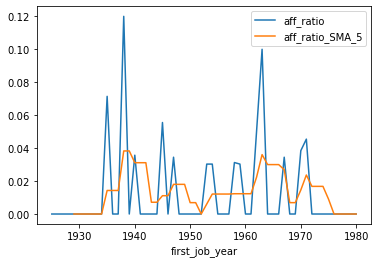

In [163]:
fig, ax = plt.subplots()
df_group14.plot(x = 'first_job_year', y = 'aff_ratio', ax = ax)
df_group14.plot(x = 'first_job_year', y = 'aff_ratio_SMA_5', ax = ax)
plt.show()

In [164]:
_df15 = df[['first_job_year', 'birth_year','moved_pref_first_job','first_job_school','counts']].copy()

In [165]:
_df15_temp = _df15.loc[df.first_job_school == 1, :]

In [166]:
df_group15 = _df15_temp.groupby(['first_job_year'])['moved_pref_first_job', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_92638/3423115278.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group15 = _df15_temp.groupby(['first_job_year'])['moved_pref_first_job', 'counts'].sum().reset_index()


In [167]:
df_group15 = df_group15[df_group15.first_job_year <= 1981]

In [168]:
df_group15['moved_ratio'] = df_group15.moved_pref_first_job/ df_group15.counts

In [169]:
df_group15['moved_ratio_SMA_5'] = df_group15['moved_ratio'].rolling(window=5).mean()

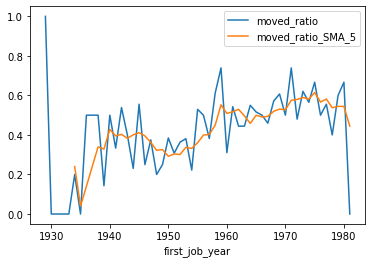

In [170]:
fig, ax = plt.subplots()
df_group15.plot(x = 'first_job_year', y = 'moved_ratio', ax = ax)
df_group15.plot(x = 'first_job_year', y = 'moved_ratio_SMA_5', ax = ax)
plt.show()

In [171]:
df_group15

,first_job_year,moved_pref_first_job,counts,moved_ratio,moved_ratio_SMA_5
0,1929,1,1,1.000000,NaN
1,1930,0,1,0.000000,NaN
2,1932,0,1,0.000000,NaN
3,1933,0,5,0.000000,NaN
4,1934,1,5,0.200000,0.240000
5,1935,0,3,0.000000,0.040000
6,1936,4,8,0.500000,0.140000
7,1937,2,4,0.500000,0.240000
8,1938,2,4,0.500000,0.340000
9,1939,1,7,0.142857,0.328571


In [172]:
df_table2 = df[['moved_pref_first_job', 'first_job_conn', 'first_job_school', 'first_job_self']]

In [172]:
df_table2.corr()

,moved_pref_first_job,first_job_conn,first_job_school,first_job_self
moved_pref_first_job,1.000000,0.050007,0.209911,-0.320429
first_job_conn,0.050007,1.000000,-0.448163,-0.421630
first_job_school,0.209911,-0.448163,1.000000,-0.331144
first_job_self,-0.320429,-0.421630,-0.331144,1.000000


In [173]:
_df16 = df[['first_job_year', 'birth_year','moved_pref_first_job','first_job_conn','counts']].copy()

In [174]:
_df16_temp = _df16.loc[df.first_job_conn == 1, :]

In [175]:
df_group16 = _df16_temp.groupby(['first_job_year'])['moved_pref_first_job', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_46330/208253932.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group16 = _df16_temp.groupby(['first_job_year'])['moved_pref_first_job', 'counts'].sum().reset_index()


In [176]:
df_group16 = df_group16[df_group16.first_job_year <= 1981]

In [177]:
df_group16['moved_ratio'] = df_group16.moved_pref_first_job/ df_group16.counts

In [178]:
df_group16['moved_ratio_SMA_5'] = df_group16['moved_ratio'].rolling(window=5).mean()

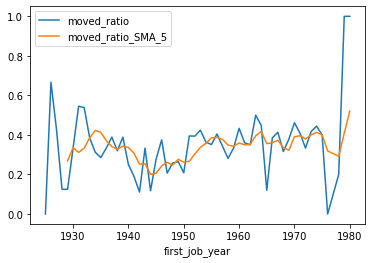

In [179]:
fig, ax = plt.subplots()
df_group16.plot(x = 'first_job_year', y = 'moved_ratio', ax = ax)
df_group16.plot(x = 'first_job_year', y = 'moved_ratio_SMA_5', ax = ax)
plt.show()

In [180]:
_df17= df[['first_job_year', 'birth_year','moved_pref_first_job','first_job_self','counts']].copy()

In [181]:
_df17_temp = _df17.loc[df.first_job_self == 1, :]

In [182]:
df_group17 = _df17_temp.groupby(['first_job_year'])['moved_pref_first_job', 'counts'].sum().reset_index()

/var/folders/hb/3db8mbcj4l74ztsvqyx17yd00000gn/T/ipykernel_46330/2982392576.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group17 = _df17_temp.groupby(['first_job_year'])['moved_pref_first_job', 'counts'].sum().reset_index()


In [183]:
df_group17 = df_group17[df_group17.first_job_year <= 1981]

In [184]:
df_group17['moved_ratio'] = df_group17.moved_pref_first_job/ df_group17.counts

In [185]:
df_group17['moved_ratio_SMA_5'] = df_group17['moved_ratio'].rolling(window=5).mean()

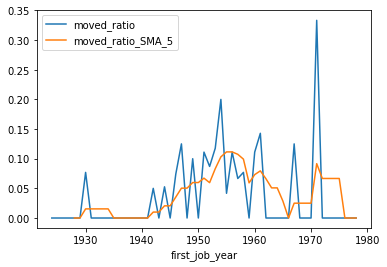

In [186]:
fig, ax = plt.subplots()
df_group17.plot(x = 'first_job_year', y = 'moved_ratio', ax = ax)
df_group17.plot(x = 'first_job_year', y = 'moved_ratio_SMA_5', ax = ax)
plt.show()

In [187]:
birth_year_list = df.birth_year.unique()

In [188]:
import numpy as np

In [189]:
np.sort(birth_year_list)

array([1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956])

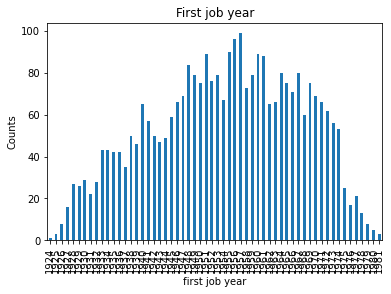

In [190]:
fig, ax = plt.subplots()
_df_hist = df[df.first_job_year <= 1981]
ax = _df_hist.first_job_year.value_counts().sort_index().plot(kind = 'bar')
plt.title('First job year')
ax.set_xlabel('first job year')
ax.set_ylabel('Counts')
plt.show()